## Forward Euler and default RK45 methods to integrate a damped spring-mass ODE system.

From [this lecture](https://youtu.be/r1eWerqrcqo):

The equation of motion with a damped spring mass sytem is:

$$F = m\, \ddot x = -k \, x -d \, \dot x$$

Moving to the RHS:

$$m\,\ddot x  +d \, \dot x + k\,x =0$$

We can get rid of $m$ if $\zeta = d/m$ and $\omega^2 = k/m,$ yielding



$$\ddot x  +\zeta \, \dot x + \omega^2 \,x =0\tag 1$$

Guessing the solution to be $x(t) = e^{\lambda t},$ which implies that $\dot x(t) =\lambda\,e^{\lambda t}$ and $\ddot x(t) =\lambda^2\,e^{\lambda t}$.


 Plugging this back into equation $1:$


$$\lambda^2\,e^{\lambda t} + \zeta \, \lambda\,e^{\lambda t} + \omega^2 \, e^{\lambda t}=0$$

results in the characteristic equation:

$$\lambda^2 + \zeta \, \lambda+ \omega^2 =0$$

The final solution will depend on the inital conditions, but have the form:

$$x(t) = c_1\, e^{\lambda_1 t} + c_21 \, e^{\lambda_2 t}$$

This can be alternatively solved by suspending variables to turn the second order ODE into a system of first order ODE by $\dot x=v$ and $\dot v=-\omega^2\,x - \zeta v.$ As a system of equations:

$$d/dt \begin{bmatrix} x \\ v \end{bmatrix}=\underset{\bf A}{\underbrace{\begin{bmatrix} 0 & 1 \\ -\omega^2& -\zeta \end{bmatrix}}} \quad\underset{\bf x}{\underbrace{\begin{bmatrix} x \\ v \end{bmatrix}}}$$

The eigenvalues of the matrix satisfy the characteristic equation.

The **forward Euler integration method** approximates the above equation,

$$\bf \dot x = A \, x$$

as

$$\Delta \,{\bf x} ={\bf A} \,{\bf x} \, \Delta t \tag 2$$

so that we can set up the difference equation

$${\bf x}_{k+1} = {\bf x}_k + {\bf A\; x}_k \, \Delta t$$

and $t_k = k \, \Delta t$

This can be further expressed as

$${\bf x}_{k+1} = {\bf x}_k + {\bf A\; x}_k \, \Delta t = \underset{{\text{Taylor expans of }}e^{{\bf A}\,\Delta t}}{\underbrace{\left(\mathbb I + {\bf A}\,\Delta t \right)}} {\bf x}_k \tag {*}$$

In general, if ${\bf x}_{k+1}= {\bf x}(t_k + \Delta t),$ the Taylor expansion will be the same as for

$$f(\color{blue}x+\color{blue}\varepsilon)=f(\color{blue}x)+\frac{f'(\color{blue}x)}{1!}\color{blue}\varepsilon+\frac{f''(\color{blue}x)}{2!}\color{blue}\varepsilon^2+\cdots$$

and the first two terms coincide with the Forward Euler expression

$${\bf x}_k  + {\bf A}\, \Delta t \,{\bf x}_k t$$

where $ɛ= \Delta t$ and $f(x) = {\bf x}(t_k)={\bf x}_k$

For a non-linear, more general system the Taylor expansion of the actual forward step ${\bf x}_{k+1}= {\bf x}(t_k + \Delta t),$ as explained [here](https://youtu.be/h2i550iaEv0?t=150) would be

$${\bf x}(t_k + \Delta t)={\bf x}(t_k) + \frac {d{\bf x}(t_k)}{dt}\Delta t +\frac 1{2!}\frac {d^2{\bf x}(t_k)}{dt^2}\Delta t^2 +\cdots$$

The second term $\frac {d{\bf x}(t_k)}{dt}\Delta t = {\bf A\, x}_k\,\Delta t$ per equation $(2).$

Where did the exponential arise from in $(*)$? Simply from the known solution to the system ${\bf \dot x}(t) = {\bf A \, x}(t)$ being $e^{{\bf At}}{\bf x}_0.$

In [ ]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.integrate import solve_ivp

In [ ]:
# play around with different 'd' and 'dt' to see various behavior!

w = 2 * np.pi  # natural frequency
d = .25        # damping ratio

# spring-mass-damper system
A = np.array([[0, 1], [-w ** 2, -2 * d * w]])  # \dot{x} = Ax

print(A)

dt = 0.01  # time step
T = 10     # amount of time to integrate
n = int(T / dt)
t = np.linspace(0, T, n)

x0 = [2, 0]  # initial condition (x=2, v=0)

[[  0.           1.        ]
 [-39.4784176   -3.14159265]]


#### Forward Euler method:



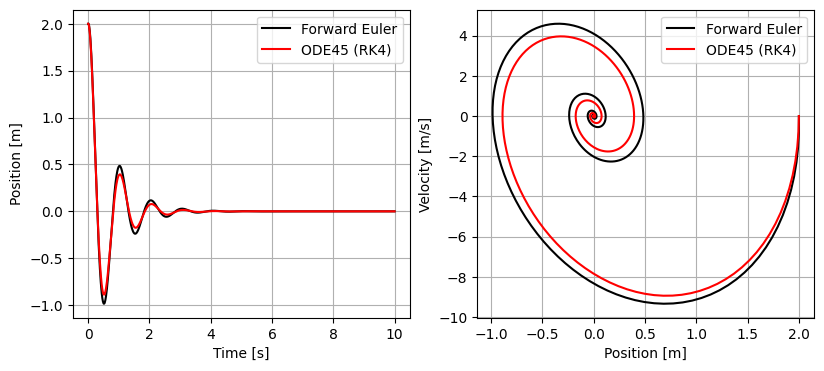

In [ ]:
# iterate forward Euler
xF = np.zeros((2, n))
xF[:, 0] = x0

for k in range(n - 1):
    xF[:, k + 1] = (np.eye(2) + dt * A) @ xF[:, k] # (A dt) @ X_k where @ is matrix multiplication

# compute better integral using built-in python code
# 4th-order Runge Kutta

def linear_ode(t, x):
    return A @ x  # @ symbol for matrix-vector product here

linear_ode_solution = solve_ivp(linear_ode, (0, T), x0, t_eval=t)
xGood = linear_ode_solution.y

plt.figure(figsize=(20, 4))
plt.subplot(1, 4, 1)
plt.plot(t, xF[0, :], 'k')
plt.plot(t, xGood[0, :],'r')
plt.xlabel('Time [s]')
plt.ylabel('Position [m]')
plt.legend(['Forward Euler', 'ODE45 (RK4)'])
plt.grid(True)

plt.subplot(1, 4, 2)
plt.plot(xF[0, :], xF[1, :], 'k')
plt.plot(xGood[0, :], xGood[1, :], 'r')
plt.xlabel('Position [m]')
plt.ylabel('Velocity [m/s]')
plt.legend(['Forward Euler', 'ODE45 (RK4)'])
plt.grid(True)

[[  0.           1.        ]
 [-39.4784176   -3.14159265]]


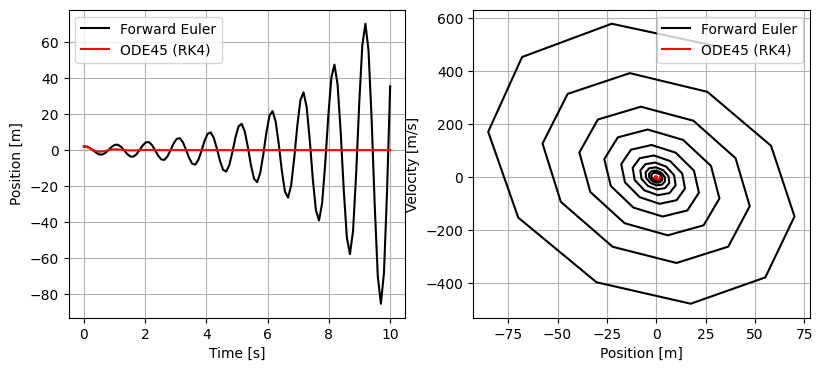

In [ ]:
# play around with different 'd' and 'dt' to see various behavior!

w = 2 * np.pi  # natural frequency
d = .25        # damping ratio

# spring-mass-damper system
A = np.array([[0, 1], [-w ** 2, -2 * d * w]])  # \dot{x} = Ax

print(A)

dt = 0.1  # time step
T = 10     # amount of time to integrate
n = int(T / dt)
t = np.linspace(0, T, n)

x0 = [2, 0]  # initial condition (x=2, v=0)
# iterate forward Euler
xF = np.zeros((2, n))
xF[:, 0] = x0

for k in range(n - 1):
    xF[:, k + 1] = (np.eye(2) + dt * A) @ xF[:, k] # (A dt) @ X_k where @ is matrix multiplication

# compute better integral using built-in python code
# 4th-order Runge Kutta

def linear_ode(t, x):
    return A @ x  # @ symbol for matrix-vector product here

linear_ode_solution = solve_ivp(linear_ode, (0, T), x0, t_eval=t)
xGood = linear_ode_solution.y

plt.figure(figsize=(20, 4))
plt.subplot(1, 4, 1)
plt.plot(t, xF[0, :], 'k')
plt.plot(t, xGood[0, :],'r')
plt.xlabel('Time [s]')
plt.ylabel('Position [m]')
plt.legend(['Forward Euler', 'ODE45 (RK4)'])
plt.grid(True)

plt.subplot(1, 4, 2)
plt.plot(xF[0, :], xF[1, :], 'k')
plt.plot(xGood[0, :], xGood[1, :], 'r')
plt.xlabel('Position [m]')
plt.ylabel('Velocity [m/s]')
plt.legend(['Forward Euler', 'ODE45 (RK4)'])
plt.grid(True)

[[  0.           1.        ]
 [-39.4784176    3.14159265]]


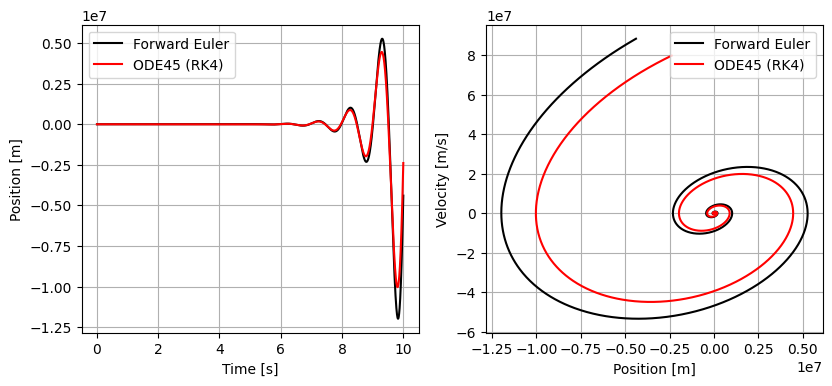

In [ ]:
# play around with different 'd' and 'dt' to see various behavior!

w = 2 * np.pi  # natural frequency
d = .25        # damping ratio

# spring-mass-damper system
A = np.array([[0, 1], [-w ** 2, 2 * d * w]])  # \dot{x} = Ax

print(A)

dt = 0.001  # time step
T = 10     # amount of time to integrate
n = int(T / dt)
t = np.linspace(0, T, n)

x0 = [2, 0]  # initial condition (x=2, v=0)
# iterate forward Euler
xF = np.zeros((2, n))
xF[:, 0] = x0

for k in range(n - 1):
    xF[:, k + 1] = (np.eye(2) + dt * A) @ xF[:, k] # (A dt) @ X_k where @ is matrix multiplication

# compute better integral using built-in python code
# 4th-order Runge Kutta

def linear_ode(t, x):
    return A @ x  # @ symbol for matrix-vector product here

linear_ode_solution = solve_ivp(linear_ode, (0, T), x0, t_eval=t)
xGood = linear_ode_solution.y

plt.figure(figsize=(20, 4))
plt.subplot(1, 4, 1)
plt.plot(t, xF[0, :], 'k')
plt.plot(t, xGood[0, :],'r')
plt.xlabel('Time [s]')
plt.ylabel('Position [m]')
plt.legend(['Forward Euler', 'ODE45 (RK4)'])
plt.grid(True)

plt.subplot(1, 4, 2)
plt.plot(xF[0, :], xF[1, :], 'k')
plt.plot(xGood[0, :], xGood[1, :], 'r')
plt.xlabel('Position [m]')
plt.ylabel('Velocity [m/s]')
plt.legend(['Forward Euler', 'ODE45 (RK4)'])
plt.grid(True)